# Importing the Dataset using PySpark

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spark=SparkSession.builder.config("spark.driver.host", "localhost").appName('StockAnalysis').getOrCreate()

In [3]:
spark

In [15]:
#  Load the dataset into a Spark DataFrame
file_path = r"F:\ass2\stock\fh_5yrs.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Sampling the Dataset 

In [16]:
#  Sample the dataset
# 0.02 means 2% of the data.
sample_df = df.sample(withReplacement=False, fraction=0.02, seed=42)

sample_df.show()

+----------+------+------------------+------------------+------------------+------------------+------------------+------+
|      date|volume|              open|              high|               low|             close|          adjclose|symbol|
+----------+------+------------------+------------------+------------------+------------------+------------------+------+
|2020-06-10|316900|17.200000762939453|17.350000381469727|17.079999923706055|17.350000381469727|17.350000381469727|  AAAU|
|2020-02-03| 57100|15.739999771118164|15.760000228881836| 15.68000030517578|15.729999542236328|15.729999542236328|  AAAU|
|2020-01-28| 37700|15.720000267028807|15.729999542236328|15.649999618530273|15.649999618530273|15.649999618530273|  AAAU|
|2019-10-08| 41300|15.039999961853027|15.050000190734865|14.949999809265135|15.020000457763672|15.020000457763672|  AAAU|
|2019-09-16| 81500|14.979999542236328|15.029999732971193|  14.9399995803833|14.970000267028807|14.970000267028807|  AAAU|
|2019-07-26| 28400|14.21

In [17]:
sample_df.count()

137062

# Descriptive Analysis

## Checking for Missing Values

In [24]:
# Check for missing values in sample_df
missing_values = sample_df.select([sum(col(c).isNull().cast('int')).alias(c) for c in sample_df.columns]).toPandas()

print("Number of missing values in the Sample DataFrame:")
print("       ")
print(missing_values)

Number of missing values in the Sample DataFrame:
       
   date  volume  open  high  low  close  adjclose  symbol
0     0       0     0     0    0      0         0       0


## Checking the Shape of the Data

In [25]:
# Check shape of data in sample_df
num_rows_sample = sample_df.count()
num_cols_sample = len(sample_df.columns)
print(f"Shape of the Sample DataFrame: ({num_rows_sample} rows, {num_cols_sample} columns)")

Shape of the Sample DataFrame: (137062 rows, 8 columns)


## Checking the Data Type of the Data

In [26]:
# Check data types of each feature in sample_df
data_types_sample = [(col_name, col_data_type) for col_name, col_data_type in sample_df.dtypes]
print("Data types of each feature in the Sample DataFrame:")
for col_name, col_data_type in data_types_sample:
    print(f"{col_name}: {col_data_type}")


Data types of each feature in the Sample DataFrame:
date: date
volume: bigint
open: double
high: double
low: double
close: double
adjclose: double
symbol: string


## Summary of statistics

In [30]:
# Drop the 'symbol' column from sample_df because it is a categorial variable
sample_df_dropped = sample_df.drop('symbol')
sample_df_dropped.show()

+----------+------+------------------+------------------+------------------+------------------+------------------+
|      date|volume|              open|              high|               low|             close|          adjclose|
+----------+------+------------------+------------------+------------------+------------------+------------------+
|2020-06-10|316900|17.200000762939453|17.350000381469727|17.079999923706055|17.350000381469727|17.350000381469727|
|2020-02-03| 57100|15.739999771118164|15.760000228881836| 15.68000030517578|15.729999542236328|15.729999542236328|
|2020-01-28| 37700|15.720000267028807|15.729999542236328|15.649999618530273|15.649999618530273|15.649999618530273|
|2019-10-08| 41300|15.039999961853027|15.050000190734865|14.949999809265135|15.020000457763672|15.020000457763672|
|2019-09-16| 81500|14.979999542236328|15.029999732971193|  14.9399995803833|14.970000267028807|14.970000267028807|
|2019-07-26| 28400|14.210000038146973|14.210000038146973|14.149999618530273|14.1

In [31]:
# Get summary of statistics for sample_df
summary_stats_sample = sample_df_dropped.describe().toPandas().transpose()
summary_stats_sample = summary_stats_sample.rename(columns={0: "Statistic"})
print("Summary of statistics for the Sample DataFrame:")
print(summary_stats_sample)

Summary of statistics for the Sample DataFrame:
         Statistic                  1                   2  \
summary      count               mean              stddev   
volume      137062  997208.0095358305   4298605.765046755   
open        137062  88.51161794242581   2382.056494947891   
high        137062  90.86672138637333   2482.592389753217   
low         137062  85.68429833475324   2230.303254585914   
close       137062  87.47958160187233  2297.0195670678836   
adjclose    137062  85.49115460442054  2290.8739574618467   

                             3          4  
summary                    min        max  
volume                       1  304147100  
open      0.001000000047497451   467500.0  
high      0.001000000047497451   472500.0  
low       0.001000000047497451   435000.0  
close     0.001000000047497451   440000.0  
adjclose   -3.3590068817138667   440000.0  


## Making Countplots on the categorical and numerical Features

In [5]:
# Identify binary, categorical, and numerical features
binary_features = []
categorical_features = []
numerical_features = []

for column, dtype in sample_df.dtypes:
    if dtype == "boolean":
        binary_features.append(column)
    elif dtype == "string" or dtype == "date":
        categorical_features.append(column)
    else:
        numerical_features.append(column)

# Print identified features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Binary Features:", binary_features)


Numerical Features: ['volume', 'open', 'high', 'low', 'close', 'adjclose']
Categorical Features: ['date', 'symbol']
Binary Features: []


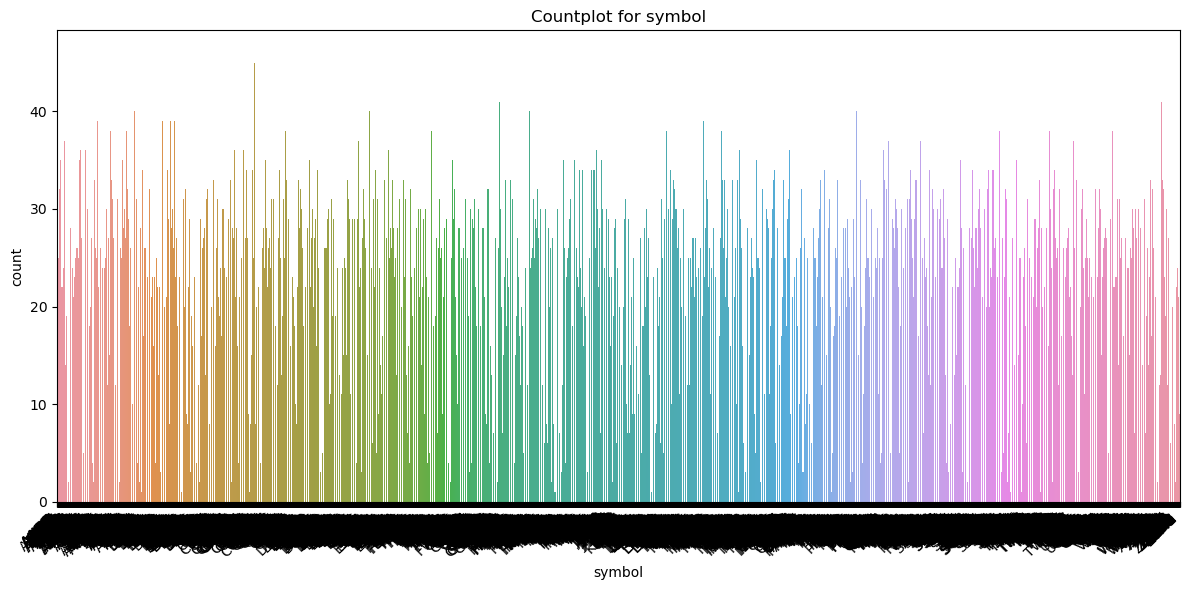

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# Countplot for categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=sample_df.toPandas())
    plt.title(f'Countplot for {feature}')
    plt.show()

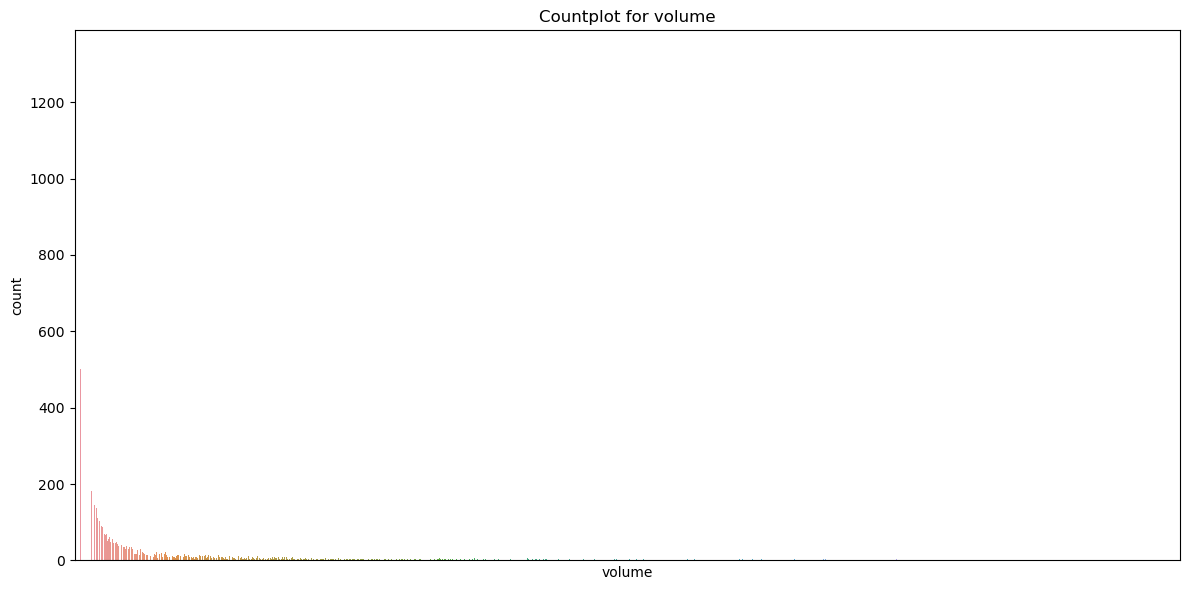

In [69]:
numerical_feature = 'volume' 

# Countplot for the chosen numerical feature
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x=numerical_feature, data=sample_df.toPandas())
plt.title(f'Countplot for {numerical_feature}')
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()  # Adjust plot layout
plt.show()


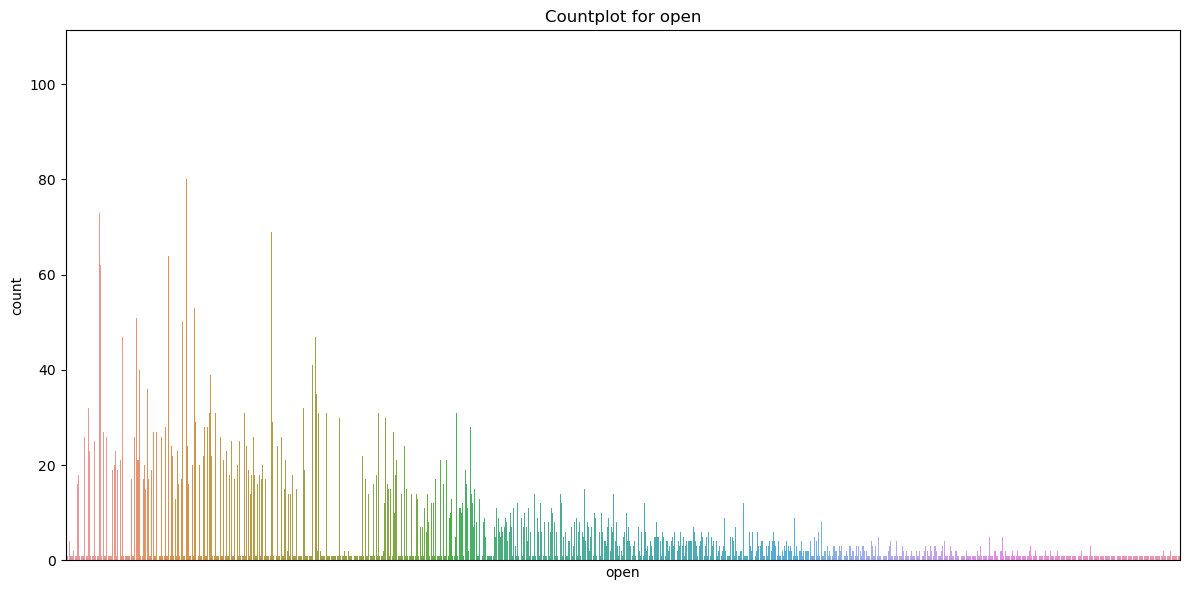

In [62]:
# Choose a single numerical feature
numerical_feature = 'open'  
# Countplot for the chosen numerical feature
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x=numerical_feature, data=sample_df.toPandas())
plt.title(f'Countplot for {numerical_feature}')
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()  # Adjust plot layout
plt.show()


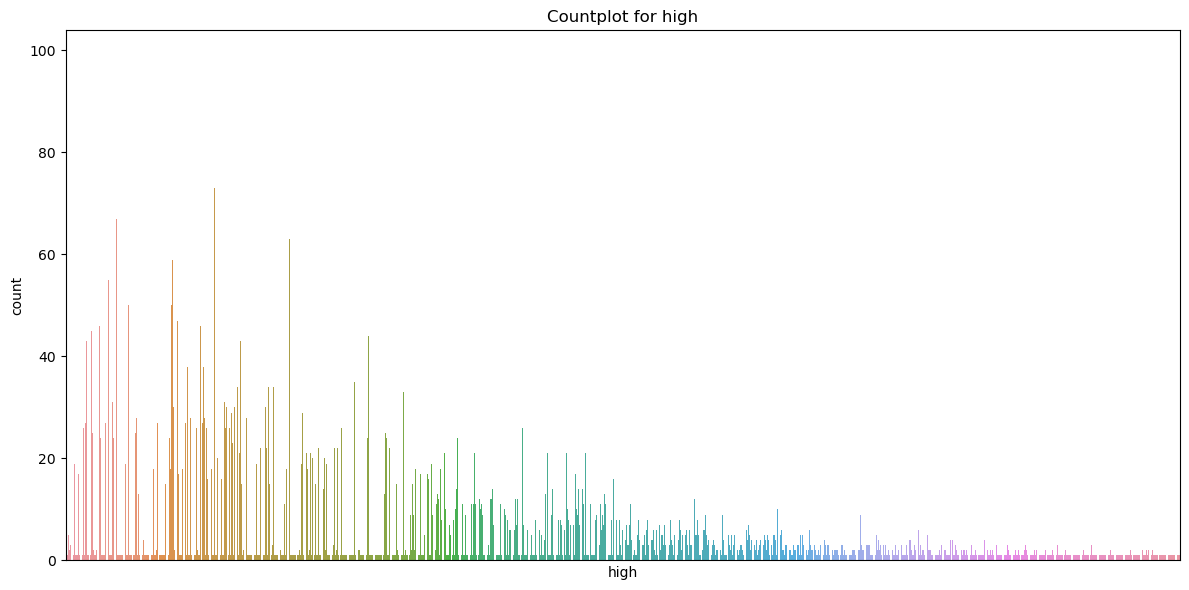

In [70]:
# Choose a single numerical feature
numerical_feature = 'high'  # Change this to the desired numerical feature

# Countplot for the chosen numerical feature
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x=numerical_feature, data=sample_df.toPandas())
plt.title(f'Countplot for {numerical_feature}')
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()  # Adjust plot layout
plt.show()


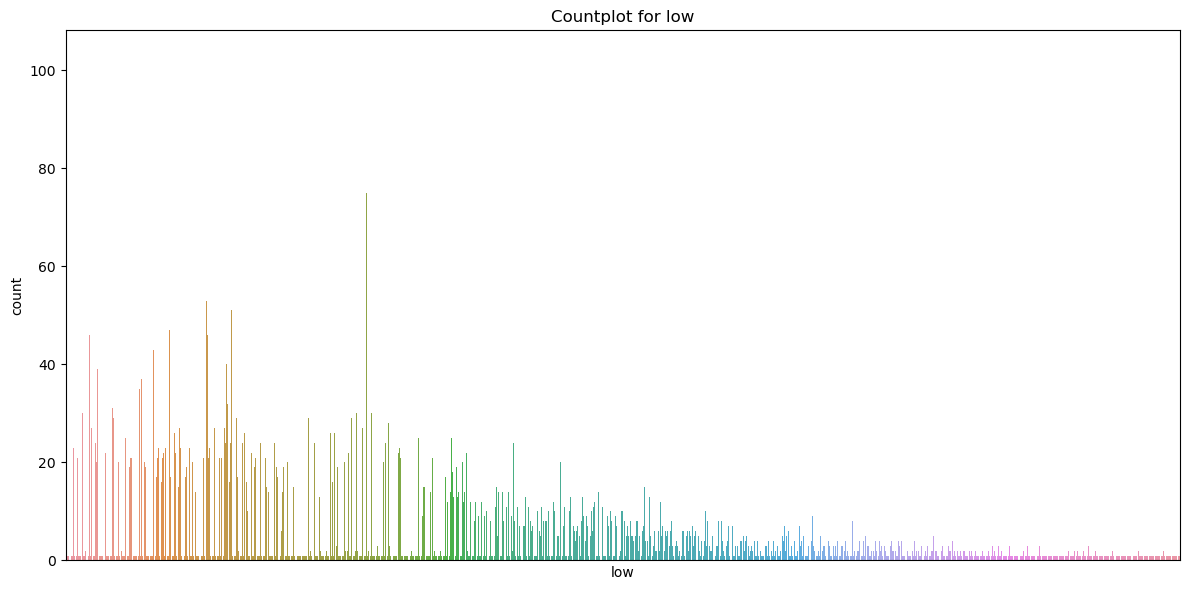

In [71]:
# Choose a single numerical feature
numerical_feature = 'low'  

# Countplot for the chosen numerical feature
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x=numerical_feature, data=sample_df.toPandas())
plt.title(f'Countplot for {numerical_feature}')
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()  # Adjust plot layout
plt.show()


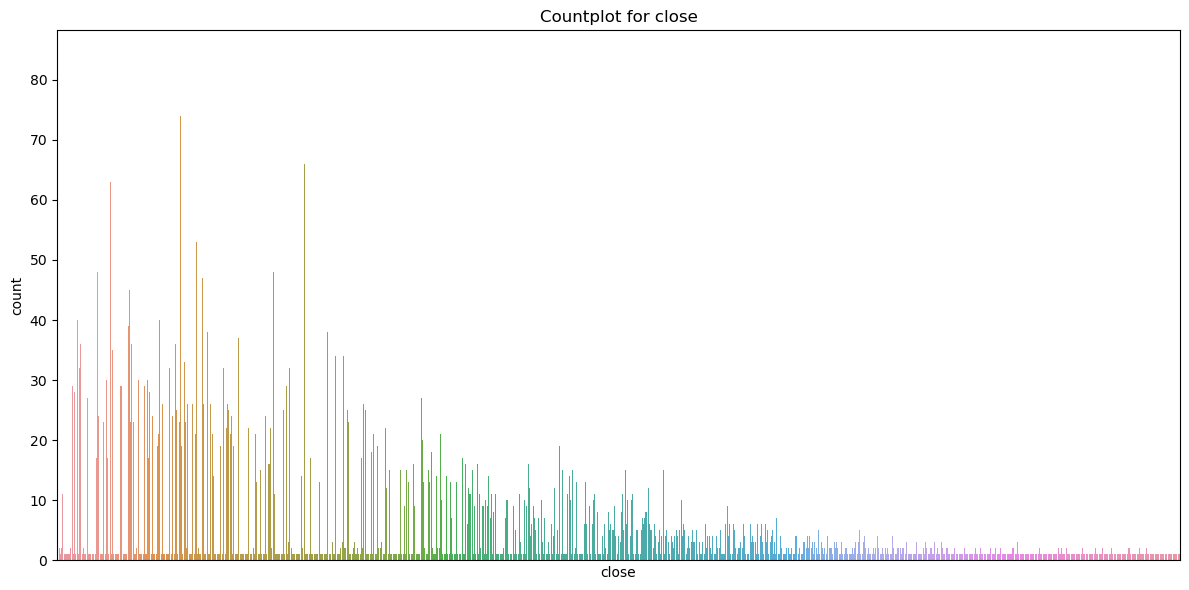

In [73]:
# Choose a single numerical feature
numerical_feature = 'close'  
# Countplot for the chosen numerical feature
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x=numerical_feature, data=sample_df.toPandas())
plt.title(f'Countplot for {numerical_feature}')
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()  # Adjust plot layout
plt.show()


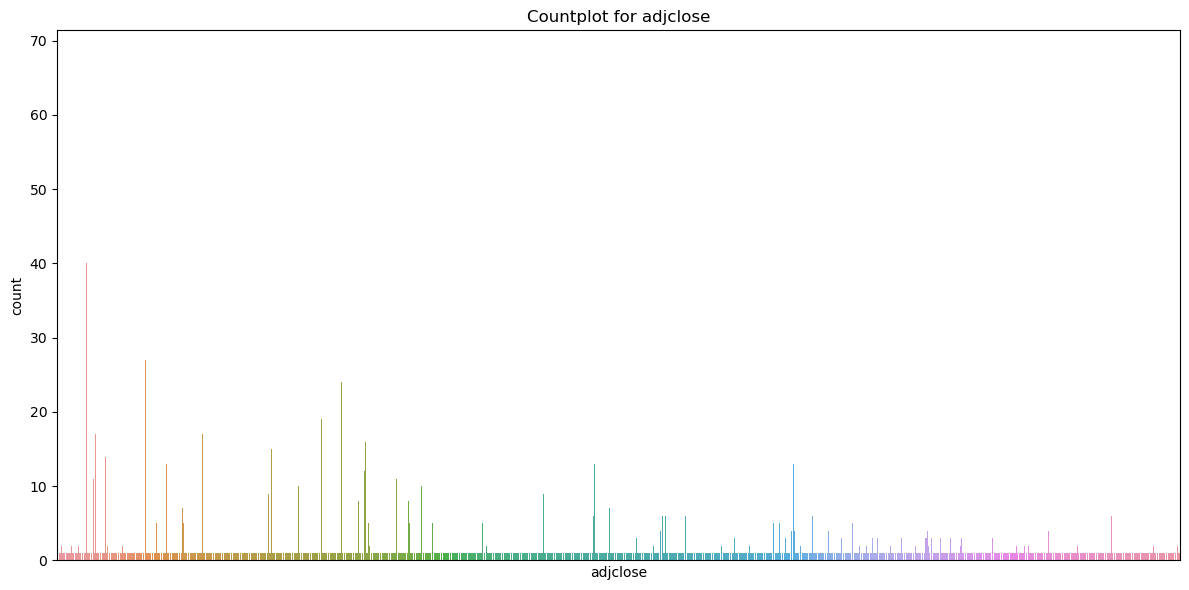

In [65]:
# Choose a single numerical feature
numerical_feature = 'adjclose'  
# Countplot for the chosen numerical feature
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(x=numerical_feature, data=sample_df.toPandas())
plt.title(f'Countplot for {numerical_feature}')
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()  # Adjust zplot layout
plt.show()


## Exploring Distribution of the Target Feature (adjclose) with Visualisation

<Figure size 1200x600 with 0 Axes>

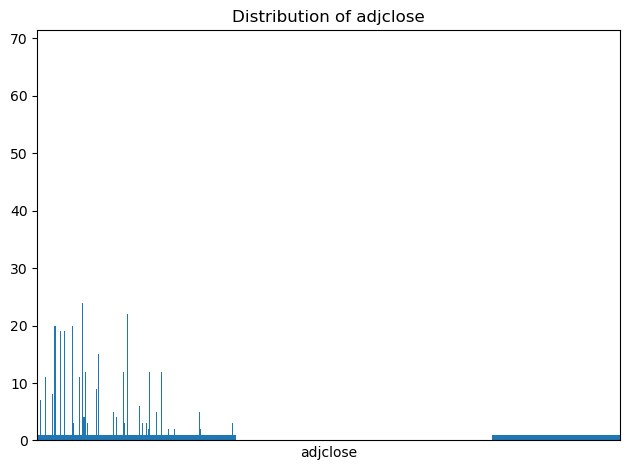

In [101]:
# Choose the target feature 'adjclose'
target_feature = 'adjclose'

# Distribution of the target feature using a bar chart
plt.figure(figsize=(12, 6))
sample_df.groupBy(target_feature).count().toPandas().plot(kind='bar', x=target_feature, y='count', legend=False)
plt.title(f'Distribution of {target_feature}')
plt.xticks([])  # To hide x-axis labels
plt.tight_layout()  # Adjust plot layout
plt.show()


## Exploring Distribution of Categorical Features with Visualisation

<Figure size 1200x600 with 0 Axes>

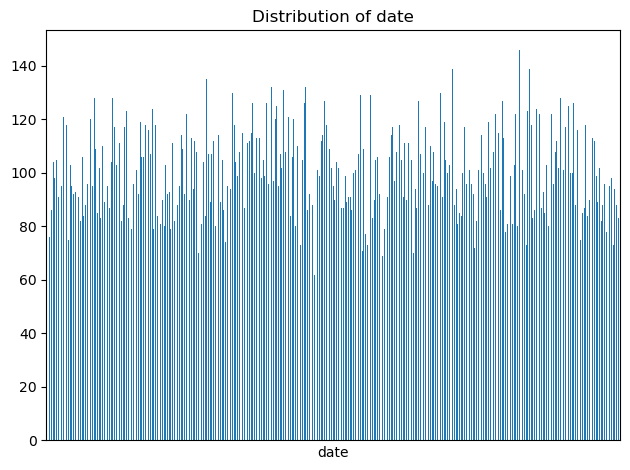

<Figure size 1200x600 with 0 Axes>

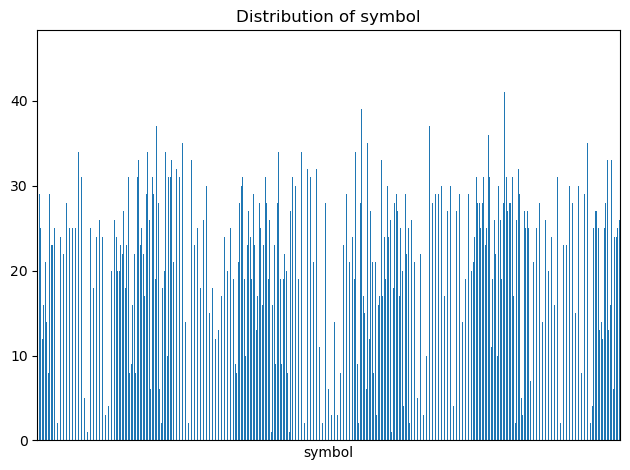

In [84]:
# Choose the categorical features
categorical_features = ['date', 'symbol']

# Distribution of categorical features using bar histograms
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sample_df.groupBy(feature).count().toPandas().plot(kind='bar', x=feature, y='count', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xticks([]) 
    plt.tight_layout()  # Adjust plot layout
    plt.show()

## Exploring Distribution of Numerical Features with Visualisation

<Figure size 1200x600 with 0 Axes>

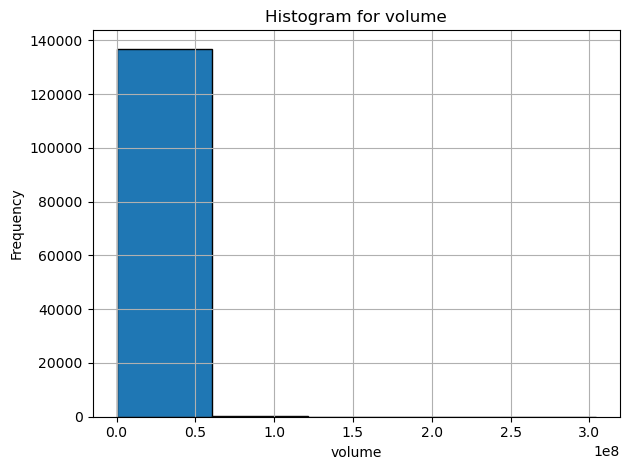

<Figure size 1200x600 with 0 Axes>

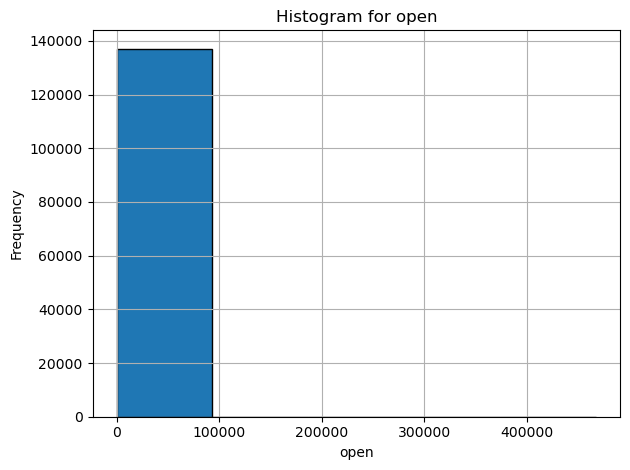

<Figure size 1200x600 with 0 Axes>

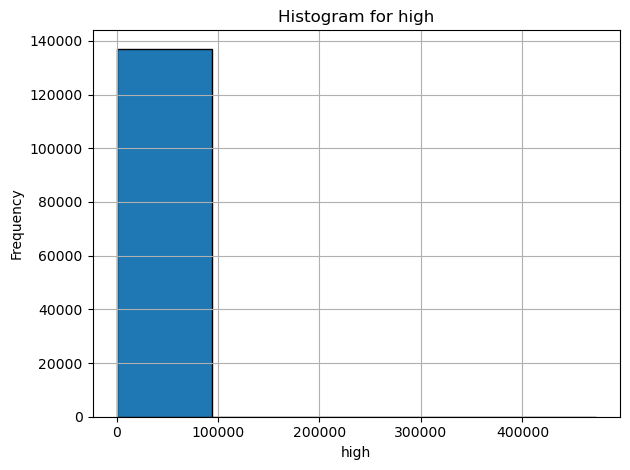

<Figure size 1200x600 with 0 Axes>

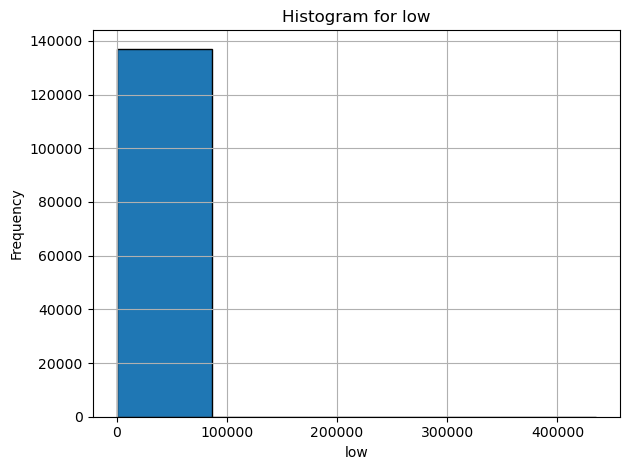

<Figure size 1200x600 with 0 Axes>

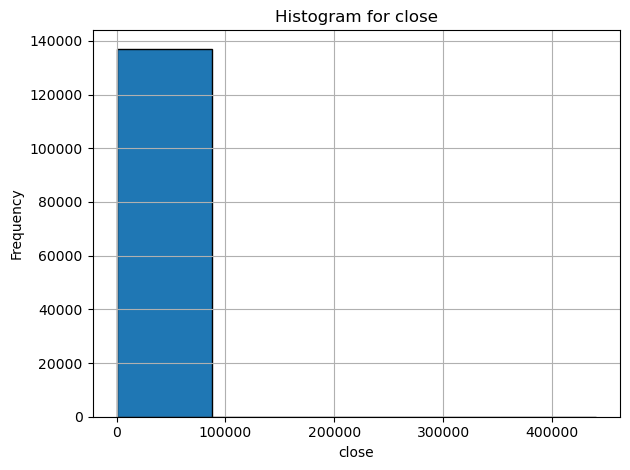

<Figure size 1200x600 with 0 Axes>

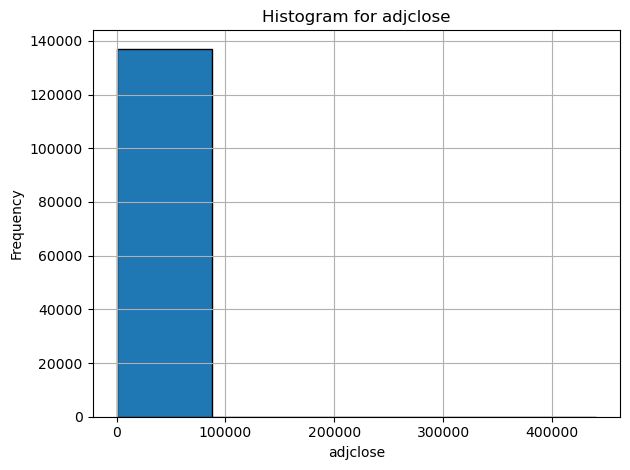

In [88]:
# Distribution of numerical features using histograms
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sample_df.select(feature).toPandas().hist(bins=5, edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust plot layout
    plt.show()

## Exploring correlations between numerical features using 
## Pearson Spearman with Heatmaps.

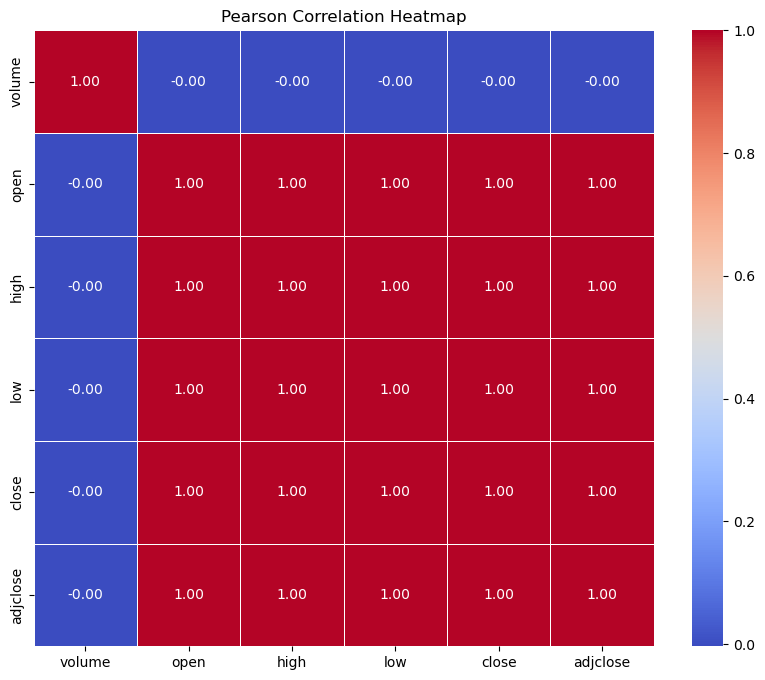

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a SparkSession named spark and a DataFrame named sample_df
# If not, replace this with your actual SparkSession and DataFrame

# List of numerical features
numerical_features = ['volume', 'open', 'high', 'low', 'close', 'adjclose']

# Calculate Pearson correlation using Pandas
correlation_matrix = sample_df.select(numerical_features).toPandas().corr()

# Plotting Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


# Predictive Analysis

## Prediction using Linear Regression

In [22]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Choose target variable and features
target_variable = 'adjclose'
features = ['volume', 'open', 'high', 'low', 'close']

# Create a feature vector using VectorAssembler
assembler = VectorAssembler(inputCols=features, outputCol='features')
assembled_df = assembler.transform(sample_df)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Initialize Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol=target_variable)

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Display the predicted values and actual values
predictions.select('features', target_variable, 'prediction').show()

# Evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol=target_variable, predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


+--------------------+------------------+------------------+
|            features|          adjclose|        prediction|
+--------------------+------------------+------------------+
|[16300.0,6.230000...| 6.320000171661378|  4.61311780312551|
|[389900.0,3.75,3....|3.5699999332427983|1.8721980947172834|
|[1232700.0,22.649...|11.606571197509766|20.533962803286883|
|[1280100.0,130.88...|112.03226470947266|127.84732798614682|
|[731900.0,131.202...|113.24231719970705|129.23145801411601|
|[66700.0,6.75,6.9...| 6.769999980926514| 5.064182621961473|
|[1730300.0,72.889...| 71.83999633789062| 69.75411192270586|
|[1338300.0,58.549...| 57.52000045776367|  55.5572215240852|
|[65000.0,27.30999...| 23.87105369567871| 26.30143075114925|
|[106200.0,17.4300...|16.930000305175778| 15.15899120553362|
|[187000.0,27.4300...| 20.12439727783203|25.464700817475947|
|[1100.0,9.4899997...| 8.944940567016602| 7.733123004721092|
|[139000.0,33.1399...| 26.63547515869141|31.928368665248403|
|[1876100.0,5.3000...| 5

## Prediction using Linear Regression with Hyper Parameter Tuning

In [11]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler


# Choose target variable and features
target_variable = 'adjclose'
features = ['volume', 'open', 'high', 'low', 'close']

# Create a feature vector using VectorAssembler
assembler = VectorAssembler(inputCols=features, outputCol='features')
assembled_df = assembler.transform(sample_df)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Initialize Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol=target_variable)

# Create a ParamGrid for hyperparameter tuning
param_grid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.1, 0.5])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .addGrid(lr.maxIter, [10, 20, 30])
              .build())

# Evaluate using Root Mean Squared Error (RMSE)
evaluator = RegressionEvaluator(labelCol=target_variable, predictionCol='prediction', metricName='rmse')

# Initialize CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3, seed=42)

# Fit the model
cv_model = cv.fit(train_data)

# Make predictions on the test data
predictions = cv_model.transform(test_data)

# Display the predicted values and actual values
predictions.select('features', target_variable, 'prediction').show()

# Evaluate the tuned model
rmse_tuned = evaluator.evaluate(predictions)
print(f"Tuned Model RMSE: {rmse_tuned}")

# Get the best hyperparameters from the tuned model
best_params = cv_model.bestModel.extractParamMap()
print("Best Hyperparameters:")
for key, val in best_params.items():
    print(f"{key.name}: {val}")


+--------------------+------------------+------------------+
|            features|          adjclose|        prediction|
+--------------------+------------------+------------------+
|[16300.0,6.230000...| 6.320000171661378|4.6074416110370615|
|[389900.0,3.75,3....|3.5699999332427983| 1.867074541503509|
|[1232700.0,22.649...|11.606571197509766|20.531702052333408|
|[1280100.0,130.88...|112.03226470947266|127.85884817987194|
|[731900.0,131.202...|113.24231719970705|129.24064233483588|
|[66700.0,6.75,6.9...| 6.769999980926514| 5.059540537327985|
|[1730300.0,72.889...| 71.83999633789062| 69.75863025687646|
|[1338300.0,58.549...| 57.52000045776367|55.560701623687194|
|[65000.0,27.30999...| 23.87105369567871|26.295519334626903|
|[106200.0,17.4300...|16.930000305175778|15.155152899613087|
|[187000.0,27.4300...| 20.12439727783203|25.461379424078075|
|[1100.0,9.4899997...| 8.944940567016602| 7.729253609925953|
|[139000.0,33.1399...| 26.63547515869141|31.925605095079177|
|[1876100.0,5.3000...| 5

## Prediction using Random Forest Regressor with Hyper Parameter Tuning (Best Model)

In [5]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler


# Choose target variable and features
target_variable = 'adjclose'
features = ['volume', 'open', 'high', 'low', 'close']

# Create a feature vector using VectorAssembler
assembler = VectorAssembler(inputCols=features, outputCol='features')
assembled_df = assembler.transform(sample_df)

# Split the data into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Initialize Random Forest Regressor model
rf = RandomForestRegressor(featuresCol='features', labelCol=target_variable)

# Create a ParamGrid for hyperparameter tuning
param_grid = (ParamGridBuilder()
              .addGrid(rf.numTrees, [10, 20, 30])
              .addGrid(rf.maxDepth, [5, 10, 15])
              .build())

# Evaluate using Root Mean Squared Error (RMSE)
evaluator = RegressionEvaluator(labelCol=target_variable, predictionCol='prediction', metricName='rmse')

# Initialize CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3, seed=42)

# Fit the model
cv_model = cv.fit(train_data)

# Make predictions on the test data
predictions = cv_model.transform(test_data)

# Display the predicted values and actual values
predictions.select('features', target_variable, 'prediction').show()

# Evaluate the tuned model
rmse_tuned = evaluator.evaluate(predictions)
print(f"Tuned Random Forest Model RMSE: {rmse_tuned}")

# Get the best hyperparameters from the tuned model
best_params = cv_model.bestModel.extractParamMap()
print("Best Hyperparameters:")
for key, val in best_params.items():
    print(f"{key.name}: {val}")


+--------------------+------------------+------------------+
|            features|          adjclose|        prediction|
+--------------------+------------------+------------------+
|[16300.0,6.230000...| 6.320000171661378|3.6405913030765142|
|[389900.0,3.75,3....|3.5699999332427983|3.6405913030765142|
|[1232700.0,22.649...|11.606571197509766|22.153352942942476|
|[1280100.0,130.88...|112.03226470947266|130.58196580656306|
|[731900.0,131.202...|113.24231719970705|130.58196580656306|
|[66700.0,6.75,6.9...| 6.769999980926514|3.6405913030765142|
|[1730300.0,72.889...| 71.83999633789062| 67.94444192080198|
|[1338300.0,58.549...| 57.52000045776367| 58.01567002272699|
|[65000.0,27.30999...| 23.87105369567871| 27.86789146994302|
|[106200.0,17.4300...|16.930000305175778|15.436388642353545|
|[187000.0,27.4300...| 20.12439727783203| 27.86789146994302|
|[1100.0,9.4899997...| 8.944940567016602| 9.833311992732702|
|[139000.0,33.1399...| 26.63547515869141|34.513470285213174|
|[1876100.0,5.3000...| 5